# Digit Recognition Kaggle Competition

Requirements:
* Tensorflow
* Numpy 
* matplotlib
* Scikit-learn

In [73]:
# Import libraries
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

## Load Data

In [79]:
data = np.genfromtxt('Data/train.csv', delimiter=',')

## X train and Y train variables

In [ ]:
from keras.utils import to_categorical

# Get images
x_train = data[1:,1:]
x_train_rs = x_train.reshape(42000,28,28)

# Get trarget variables
y_train = data[1:,0]
y_train_oh = to_categorical(y_train, num_classes=10)

## Visualize image of dataset

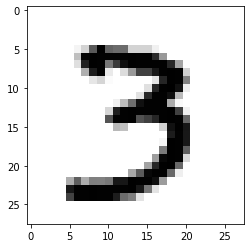

In [ ]:
plt.imshow(x_train_rs[57],cmap = plt.cm.binary)

## Create Neural Network

In [ ]:
from keras.layers import Dense
# Create model 
model = keras.Sequential()

# Add layers
model.add(Dense(10,activation = 'sigmoid', input_shape =(784,)))
model.add(Dense(10,activation = 'softmax', input_shape = (784,)))

# Model Summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


## Train Model


In [92]:
# Compilte Model
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

# Train model 
model.fit(x_train, y_train_oh, epochs = 5)

Epoch 1/5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5682 - accuracy: 0.8352
Epoch 2/5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5563 - accuracy: 0.8367
Epoch 3/5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5368 - accuracy: 0.8446
Epoch 4/5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5374 - accuracy: 0.8401
Epoch 5/5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5566 - accuracy: 0.8355


## Load test data

In [93]:
data_test = np.genfromtxt('Data/test.csv', delimiter=',')

# Get images
x_test = data_test[1:,:]

## Make predictions

In [94]:
y_pred = model.predict(x_test)

875/875 [==============================] - 1s 2ms/step


In [95]:
y_pred_val = np.argmax(y_pred,axis = 1)

## Save Results

In [110]:
# Covert to pandas and make index begin from 1
df = pd.DataFrame({'ImageId' : np.arange(1,len(y_pred_val)+1,1,dtype = 'int') ,'label' : y_pred_val})

# Save to csv

df.to_csv('predictions.csv', index = False)
